In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import json

In [24]:
%matplotlib inline

In [4]:
!ls -al|grep '.csv'

-rwxrwxrwx  1 ymp  staff       23827 May 28 19:36 acm-fellows.csv
-rwxrwxrwx  1 ymp  staff        6789 May 28 19:36 country-info.csv
-rwxrwxrwx  1 ymp  staff     1619978 May 28 19:36 csrankings.csv
-rwxrwxrwx  1 ymp  staff      100642 May 28 19:36 dblp-aliases.csv
-rwxrwxrwx  1 ymp  staff      676575 May 28 20:13 faculty-affiliations.csv
-rwxrwxrwx  1 ymp  staff     6968213 May 28 20:14 generated-author-info.csv
-rwxrwxrwx  1 ymp  staff      231155 May 28 19:36 homepage-validated.csv
-rwxrwxrwx  1 ymp  staff     1008951 May 28 20:13 homepages.csv
-rwxrwxrwx  1 ymp  staff      249699 May 28 19:36 scholar-visited.csv
-rwxrwxrwx  1 ymp  staff      516175 May 28 20:13 scholar.csv
-rwxrwxrwx  1 ymp  staff        1689 May 28 19:36 turing.csv
-rwxrwxrwx  1 ymp  staff        4191 May 28 19:36 venues.csv


In [11]:
info_df = pd.read_csv('generated-author-info.csv')
info_df

,name,dept,area,count,adjustedcount,year
0,A Min Tjoa,TU Wien,icde,1.0,0.333333,1984
1,A Min Tjoa,TU Wien,icde,1.0,0.200000,1996
2,A. Aldo Faisal,Imperial College London,icra,1.0,0.333333,2016
3,A. Aldo Faisal,Imperial College London,nips,1.0,0.142857,2018
4,A. Cüneyd Tantug,Istanbul Technical University,acl,1.0,0.333333,2007
5,A. E. Eiben,VU Amsterdam,ijcai,1.0,0.500000,2007
6,A. Ercument Cicek,Bilkent University,ismb,1.0,0.333333,2014
7,A. Jefferson Offutt,George Mason University,fse,1.0,0.166667,2016
8,A. Jefferson Offutt,George Mason University,icse,1.0,0.333333,1993
9,A. Jefferson Offutt,George Mason University,issta,1.0,0.333333,1993


In [14]:
info_grouped = info_df.groupby('name')

In [19]:
sample = info_grouped.get_group('Michael I. Jordan')

In [22]:
sample['area'].value_counts()

nips       29
icml       18
cvpr        3
kdd         3
recomb      3
pldi        2
naacl       2
acl         2
iccv        2
sigir       2
sigmod      1
icra        1
dac         1
osdi        1
focs        1
vldb        1
sosp        1
ismb        1
icde        1
emnlp       1
aaai        1
sigcomm     1
fast        1
ijcai       1
Name: area, dtype: int64

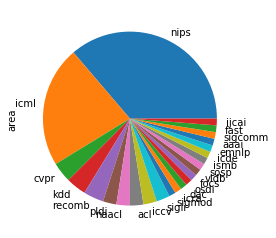

In [26]:
sample['area'].value_counts().plot('pie')

In [30]:
map_st = '''
{ area: "ai", title: "AI" },
{ area: "aaai", title: "AI" },
{ area: "ijcai", title: "AI" },
{ area: "vision", title: "Vision" },
{ area: "cvpr", title: "Vision" },
{ area: "eccv", title: "Vision" },
{ area: "iccv", title: "Vision" },
{ area: "mlmining", title: "ML" },
{ area: "icml", title: "ML" },
{ area: "kdd", title: "ML" },
{ area: "nips", title: "ML" },
{ area: "nlp", title: "NLP" },
{ area: "acl", title: "NLP" },
{ area: "emnlp", title: "NLP" },
{ area: "naacl", title: "NLP" },
{ area: "ir", title: "Web+IR" },
{ area: "sigir", title: "Web+IR" },
{ area: "www", title: "Web+IR" },
{ area: "arch", title: "Arch" },
{ area: "asplos", title: "Arch" },
{ area: "isca", title: "Arch" },
{ area: "micro", title: "Arch" },
{ area: "hpca", title: "Arch" },
{ area: "comm", title: "Networks" },
{ area: "sigcomm", title: "Networks" },
{ area: "nsdi", title: "Networks" },
{ area: "sec", title: "Security" },
{ area: "ccs", title: "Security" },
{ area: "oakland", title: "Security" },
{ area: "usenixsec", title: "Security" },
{ area: "ndss", title: "Security" },
{ area: "pets", title: "Security" },
{ area: "mod", title: "DB" },
{ area: "sigmod", title: "DB" },
{ area: "vldb", title: "DB" },
{ area: "icde", title: "DB" }, 
{ area: "pods", title: "DB" }, 
{ area: "hpc", title: "HPC" },
{ area: "sc", title: "HPC" },
{ area: "hpdc", title: "HPC" },
{ area: "ics", title: "HPC" },
{ area: "mobile", title: "Mobile" },
{ area: "mobicom", title: "Mobile" },
{ area: "mobisys", title: "Mobile" },
{ area: "sensys", title: "Mobile" },
{ area: "metrics", title: "Metrics" },
{ area: "imc", title: "Metrics" },
{ area: "sigmetrics", title: "Metrics" },
{ area: "ops", title: "OS" },
{ area: "sosp", title: "OS" },
{ area: "osdi", title: "OS" },
{ area: "fast", title: "OS" },   
{ area: "usenixatc", title: "OS" },   
{ area: "eurosys", title: "OS" },
{ area: "pldi", title: "PL" },
{ area: "popl", title: "PL" },
{ area: "icfp", title: "PL" },   
{ area: "oopsla", title: "PL" }, 
{ area: "plan", title: "PL" },
{ area: "soft", title: "SE" },
{ area: "fse", title: "SE" },
{ area: "icse", title: "SE" },
{ area: "ase", title: "SE" },    
{ area: "issta", title: "SE" },  
{ area: "act", title: "Theory" },
{ area: "focs", title: "Theory" },
{ area: "soda", title: "Theory" },
{ area: "stoc", title: "Theory" },
{ area: "crypt", title: "Crypto" },
{ area: "crypto", title: "Crypto" },
{ area: "eurocrypt", title: "Crypto" },
{ area: "log", title: "Logic" },
{ area: "cav", title: "Logic" },
{ area: "lics", title: "Logic" },
{ area: "graph", title: "Graphics" },
{ area: "siggraph", title: "Graphics" },
{ area: "siggraph-asia", title: "Graphics" },
{ area: "chi", title: "HCI" },
{ area: "chiconf", title: "HCI" },
{ area: "ubicomp", title: "HCI" },
{ area: "uist", title: "HCI" },
{ area: "robotics", title: "Robotics" },
{ area: "icra", title: "Robotics" },
{ area: "iros", title: "Robotics" },
{ area: "rss", title: "Robotics" },
{ area: "bio", title: "Comp. Bio" },
{ area: "ismb", title: "Comp. Bio" },
{ area: "recomb", title: "Comp. Bio" },
{ area: "da", title: "EDA" },
{ area: "dac", title: "EDA" },
{ area: "iccad", title: "EDA" },
{ area: "bed", title: "Embedded" },
{ area: "emsoft", title: "Embedded" },
{ area: "rtas", title: "Embedded" },
{ area: "rtss", title: "Embedded" },
{ area: "visualization", title: "Visualization" },
{ area: "vis", title: "Visualization" },
{ area: "vr", title: "Visualization" },
{ area: "ecom", title: "ECom" },
{ area: "ec", title: "ECom" },
{ area: "wine", title: "ECom" }'''

In [31]:
import re

In [35]:
len(re.findall('\n', map_st))

101

In [60]:
for line in map_st.split('\n')[1:6]:
    print(line)
    print(re.findall('(?<=")\w+', line))
    print(line.split('"'))

{ area: "ai", title: "AI" },
['ai', 'AI']
['{ area: ', 'ai', ', title: ', 'AI', ' },']
{ area: "aaai", title: "AI" },
['aaai', 'AI']
['{ area: ', 'aaai', ', title: ', 'AI', ' },']
{ area: "ijcai", title: "AI" },
['ijcai', 'AI']
['{ area: ', 'ijcai', ', title: ', 'AI', ' },']
{ area: "vision", title: "Vision" },
['vision', 'Vision']
['{ area: ', 'vision', ', title: ', 'Vision', ' },']
{ area: "cvpr", title: "Vision" },
['cvpr', 'Vision']
['{ area: ', 'cvpr', ', title: ', 'Vision', ' },']


In [61]:
area_map = {}
for line in map_st.split('\n')[1:]:
    _li = re.findall('(?<=")\w+', line)
    area_map[_li[0]] = _li[1]

In [62]:
area_map.keys()

dict_keys(['ai', 'aaai', 'ijcai', 'vision', 'cvpr', 'eccv', 'iccv', 'mlmining', 'icml', 'kdd', 'nips', 'nlp', 'acl', 'emnlp', 'naacl', 'ir', 'sigir', 'www', 'arch', 'asplos', 'isca', 'micro', 'hpca', 'comm', 'sigcomm', 'nsdi', 'sec', 'ccs', 'oakland', 'usenixsec', 'ndss', 'pets', 'mod', 'sigmod', 'vldb', 'icde', 'pods', 'hpc', 'sc', 'hpdc', 'ics', 'mobile', 'mobicom', 'mobisys', 'sensys', 'metrics', 'imc', 'sigmetrics', 'ops', 'sosp', 'osdi', 'fast', 'usenixatc', 'eurosys', 'pldi', 'popl', 'icfp', 'oopsla', 'plan', 'soft', 'fse', 'icse', 'ase', 'issta', 'act', 'focs', 'soda', 'stoc', 'crypt', 'crypto', 'eurocrypt', 'log', 'cav', 'lics', 'graph', 'siggraph', 'chi', 'chiconf', 'ubicomp', 'uist', 'robotics', 'icra', 'iros', 'rss', 'bio', 'ismb', 'recomb', 'da', 'dac', 'iccad', 'bed', 'emsoft', 'rtas', 'rtss', 'visualization', 'vis', 'vr', 'ecom', 'ec', 'wine'])

In [68]:
grouped = sample['area'].value_counts().groupby(area_map)
list(grouped)

[('AI', aaai     1
  ijcai    1
  Name: area, dtype: int64), ('Comp', recomb    3
  ismb      1
  Name: area, dtype: int64), ('DB', sigmod    1
  vldb      1
  icde      1
  Name: area, dtype: int64), ('EDA', dac    1
  Name: area, dtype: int64), ('ML', nips    29
  icml    18
  kdd      3
  Name: area, dtype: int64), ('NLP', naacl    2
  acl      2
  emnlp    1
  Name: area, dtype: int64), ('Networks', sigcomm    1
  Name: area, dtype: int64), ('OS', osdi    1
  sosp    1
  fast    1
  Name: area, dtype: int64), ('PL', pldi    2
  Name: area, dtype: int64), ('Robotics', icra    1
  Name: area, dtype: int64), ('Theory', focs    1
  Name: area, dtype: int64), ('Vision', cvpr    3
  iccv    2
  Name: area, dtype: int64), ('Web', sigir    2
  Name: area, dtype: int64)]

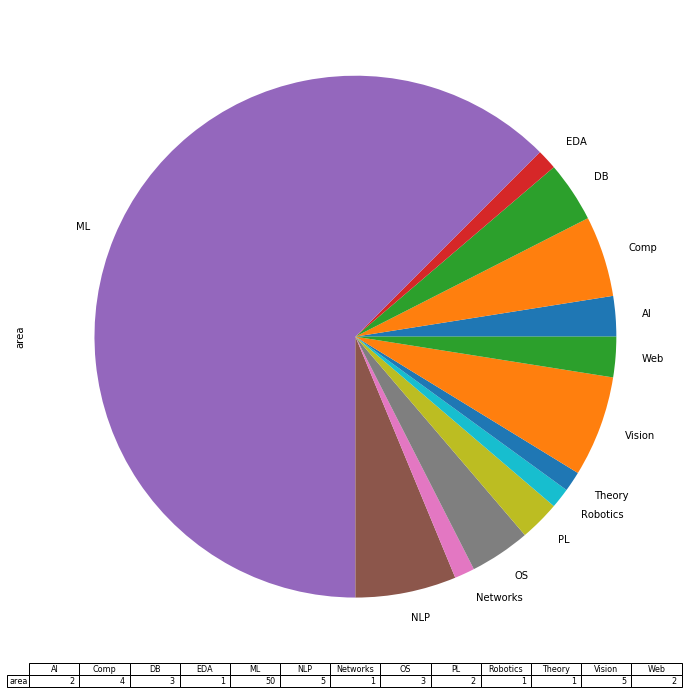

In [80]:
plt.figure(figsize=(12,12))
grouped.sum().plot('pie', table=True)

In [82]:
grouped.sum().sum()

80

In [83]:
grouped.sum()['ML']

50

In [84]:
50/80*100

62.5

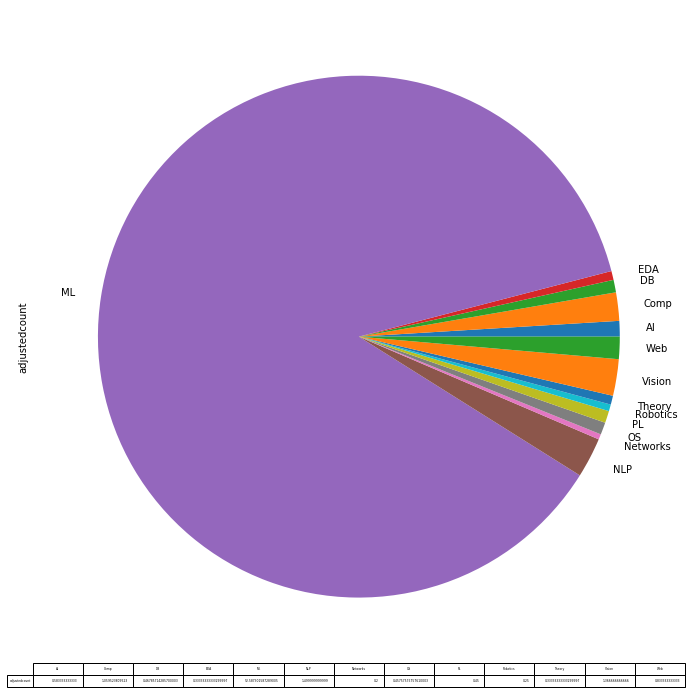

In [97]:
plt.figure(figsize=(12,12))
sample.groupby('area').sum()['adjustedcount'].groupby(area_map).sum().plot('pie', table=True)

In [101]:
sample.groupby('area').sum()['adjustedcount'].groupby(area_map).sum()

AI           0.583333
Comp         1.059524
DB           0.467857
EDA          0.333333
ML          52.587302
NLP          1.500000
Networks     0.200000
OS           0.457576
PL           0.450000
Robotics     0.250000
Theory       0.333333
Vision       1.366667
Web          0.833333
Name: adjustedcount, dtype: float64

In [99]:
sample

,dept,area,count,adjustedcount,year
64010,University of California - Berkeley,aaai,1.0,0.250000,2016
64011,University of California - Berkeley,acl,1.0,0.333333,2009
64012,University of California - Berkeley,acl,1.0,0.333333,2011
64013,University of California - Berkeley,cvpr,1.0,0.333333,2010
64014,University of California - Berkeley,cvpr,1.0,0.250000,2011
64015,University of California - Berkeley,cvpr,1.0,0.250000,2018
64016,University of California - Berkeley,dac,1.0,0.333333,2003
64017,University of California - Berkeley,emnlp,1.0,0.250000,2007
64018,University of California - Berkeley,fast,1.0,0.166667,2011
64019,University of California - Berkeley,focs,1.0,0.333333,2013


In [ ]:
info_df.groupby('name').groupby('area').sum()['adjustedcount'].groupby(area_map).sum()

In [110]:
list(info_df.groupby(['name'])['area'].sum())[0]

'icdeicde'

In [111]:
prof_dic = {}
for name, df in info_df.groupby('name'):
    prof_dic[name] = df.groupby('area').sum()['adjustedcount'].groupby(area_map).sum()

In [121]:
prof_dic['Fei-Fei Li']

AI           0.166667
HCI          0.309524
ML           3.969048
Robotics     1.211905
Vision      26.704762
Name: adjustedcount, dtype: float64

In [126]:
for i in prof_dic['Fei-Fei Li'].iteritems():
    print(i)

('AI', 0.166666666667)
('HCI', 0.30952380952400005)
('ML', 3.969047619046)
('Robotics', 1.211904761904)
('Vision', 26.704761904753997)


In [127]:
area_rank_dic = {}
for name, srs in prof_dic.items():
    for area, num in srs.iteritems():
        if area in area_rank_dic:
            area_rank_dic[area][name] = num
        else:
            area_rank_dic[area] = dict([(name, num)])

In [168]:
area_rank_json = json.dumps(area_rank_dic)
with open('area_rank.json', 'w') as f:
    f.write(area_rank_json)

In [169]:
area_map_json = json.dumps(area_map)
with open('area_map.json', 'w') as f:
    f.write(area_map_json)

In [128]:
area_rank_dic.keys()

dict_keys(['DB', 'ML', 'Robotics', 'NLP', 'AI', 'Comp', 'PL', 'SE', 'Arch', 'HPC', 'Logic', 'Theory', 'Vision', 'Embedded', 'Metrics', 'Mobile', 'Networks', 'Security', 'Crypto', 'HCI', 'Web', 'Graphics', 'OS', 'ECom', 'EDA', 'Visualization'])

In [133]:
ml_srs = pd.Series(area_rank_dic['ML'])

In [140]:
ml_top100 = ml_srs.sort_values(ascending=False)[:100]

In [165]:
ml_top100.head()

Michael I. Jordan     52.587302
Bernhard Schölkopf    30.362734
Yoshua Bengio         27.623449
Eric P. Xing          27.543651
Francis R. Bach       27.333333
dtype: float64

In [160]:
_li = []
for name in ml_top100.index:
    _li.append(info_grouped_dic[name]['dept'].value_counts().index[0])

In [164]:
li_count = collections.Counter(_li)
li_count.most_common(10)

[('Carnegie Mellon University', 7),
 ('University of California - Berkeley', 6),
 ('Cornell University', 4),
 ('University of California - San Diego', 4),
 ('University of Alberta', 4),
 ('Stanford University', 4),
 ('Technion', 3),
 ('Massachusetts Institute of Technology', 3),
 ('ETH Zurich', 3),
 ('Georgia Institute of Technology', 3)]

In [144]:
ml_top100.index[0]

'Michael I. Jordan'

In [151]:
info_grouped_dic = dict(list(info_grouped))

In [159]:
info_grouped_dic['Michael I. Jordan']['dept'].value_counts().index[0]

'University of California - Berkeley'